In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedKFold
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv ('data.csv')

In [3]:
######## first thing to do is to clean up the data :) ########
df.max()
#we can see the maximum age is invalid

Q1                   5.0
Q2                   5.0
Q3                   5.0
Q4                   5.0
Q5                   5.0
Q6                   5.0
Q7                   5.0
Q8                   5.0
Q9                   5.0
Q10                  5.0
Q11                  5.0
Q12                  5.0
Q13                  5.0
Q14                  5.0
Q15                  5.0
Q16                  5.0
Q17                  5.0
Q18                  5.0
Q19                  5.0
Q20                  5.0
Q21                  5.0
Q22                  5.0
Q23                  5.0
Q24                  5.0
Q25                  5.0
Q26                  5.0
Q27                  5.0
Q28                  5.0
Q29                  5.0
Q30                  5.0
Q31                  5.0
Q32                  5.0
affiliative          5.1
selfenhancing        5.0
agressive            5.0
selfdefeating        5.0
age              44849.0
gender               3.0
accuracy           100.0
dtype: float64

In [4]:
#change the wrong spelling of a column name according to the paper.
df.rename({'agressive': 'aggressive'}, axis=1, inplace=True)

In [5]:
#checking whether there is invalid data in 'age'
df.nlargest(10, ['age'])

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
957,1,5,2,1,3,4,4,5,3,4,...,5,5,1,4.3,3.9,2.4,2.1,44849,0,100
632,2,4,4,2,4,5,4,2,2,4,...,5,4,2,4.0,4.0,3.4,2.3,2670,2,70
293,1,3,4,2,3,5,3,3,2,3,...,5,1,3,4.4,3.8,2.5,2.8,242,1,100
303,2,5,4,3,4,5,3,4,2,4,...,5,1,4,4.5,4.1,3.4,3.9,151,1,91
23,3,4,1,5,4,4,3,4,2,4,...,5,4,3,3.8,3.8,2.6,3.8,70,2,80
704,1,3,5,2,4,5,3,2,2,3,...,2,1,4,4.6,2.8,3.3,3.0,70,1,95
33,1,5,4,4,4,5,3,4,2,5,...,5,1,4,4.6,4.6,3.3,4.0,69,1,98
501,2,3,2,2,4,5,2,3,1,3,...,-1,-1,3,4.4,2.3,1.1,1.8,69,2,95
172,4,4,2,4,3,4,4,4,2,4,...,4,4,4,3.9,3.8,3.1,3.4,68,2,90
344,2,3,3,2,4,3,4,4,4,4,...,2,4,2,3.3,3.4,3.0,2.8,67,1,80


In [6]:
## deleting the columns that has invalid ages. According to 'https://grg.org/Adams/B.HTM', the oldest human on earth is less than 130 years old, so delete the data of the participant who is 151 years old.
df.drop([957,632,293,303],0,inplace=True) 
df.reset_index(drop=True,inplace=True)

In [7]:
df.min()

Q1               -1.0
Q2               -1.0
Q3               -1.0
Q4               -1.0
Q5               -1.0
Q6               -1.0
Q7               -1.0
Q8               -1.0
Q9               -1.0
Q10              -1.0
Q11              -1.0
Q12              -1.0
Q13              -1.0
Q14              -1.0
Q15              -1.0
Q16              -1.0
Q17              -1.0
Q18              -1.0
Q19              -1.0
Q20              -1.0
Q21              -1.0
Q22              -1.0
Q23              -1.0
Q24              -1.0
Q25              -1.0
Q26              -1.0
Q27              -1.0
Q28              -1.0
Q29              -1.0
Q30              -1.0
Q31              -1.0
Q32              -1.0
affiliative       1.3
selfenhancing     0.0
aggressive        0.0
selfdefeating     0.0
age              14.0
gender            0.0
accuracy          2.0
dtype: float64

In [8]:
#checking whether there is invalid gender
df.nsmallest(10, ['gender'])

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
153,2,4,4,3,5,5,3,2,3,4,...,5,2,4,4.4,4.5,2.9,2.9,39,0,95
623,1,5,4,1,1,5,4,1,1,5,...,5,2,2,4.5,4.6,3.1,1.5,27,0,90
836,1,5,5,4,5,5,3,2,1,4,...,5,1,5,5.0,3.9,3.1,3.4,15,0,100
839,1,4,5,3,5,5,2,2,1,4,...,5,1,4,5.0,4.1,3.0,3.1,15,0,100
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80
6,4,1,2,4,2,3,3,3,4,4,...,3,4,4,2.3,2.3,2.8,2.8,27,1,60
7,2,4,4,1,5,5,4,3,2,4,...,5,2,2,4.4,4.1,3.3,2.5,34,1,88
9,4,2,4,1,3,5,4,2,3,1,...,5,3,2,2.4,2.9,3.8,2.3,18,1,85
10,1,5,1,3,4,5,4,3,2,5,...,5,2,3,4.5,4.5,3.4,2.6,33,1,86


In [9]:
#deleting colomns of invalid gender input
df.drop([153,623,836,839],0,inplace = True)
df.reset_index(drop=True,inplace=True)

In [10]:
df.nlargest(10, ['gender'])

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
137,1,4,2,5,1,5,4,3,3,4,...,5,3,2,3.3,4.3,3.1,3.5,38,3,90
199,2,3,1,3,4,4,1,4,2,3,...,5,2,2,4.5,3.4,2.4,3.1,27,3,72
216,4,5,3,3,4,5,2,4,5,3,...,4,1,2,3.0,3.8,2.6,3.5,20,3,90
471,4,1,2,1,3,5,3,1,4,1,...,4,5,1,2.5,2.3,3.0,1.6,30,3,100
555,1,3,1,1,4,5,3,2,4,4,...,5,3,1,4.3,3.5,3.0,2.4,24,3,95
748,2,4,1,2,1,4,1,1,5,1,...,4,5,1,3.5,3.0,3.6,2.0,24,3,90
821,2,4,3,3,3,4,2,1,1,5,...,5,2,4,4.5,4.0,2.5,2.1,21,3,80
838,3,2,3,3,2,4,2,3,4,2,...,5,3,2,2.6,3.3,2.9,2.6,19,3,80
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90


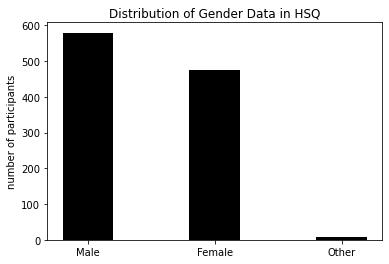

In [11]:
fig, ax = plt.subplots()
labels,counts = np.unique(df['gender'], return_counts=True)
plt.bar(labels, counts, align='center',color='k',width=0.4)
plt.xticks([1, 2, 3], ['Male', 'Female', 'Other'])
plt.ylabel('number of participants')
plt.title("Distribution of Gender Data in HSQ")
fig.savefig('gender.png')

In [12]:
#we focus on the data between male and female because the amount of other genders is too small compared to male and female
df.drop([137,199,216,471,555,748,821,838],0,inplace = True)
df.reset_index(drop=True,inplace=True)

In [13]:
df.min()

Q1               -1.0
Q2               -1.0
Q3               -1.0
Q4               -1.0
Q5               -1.0
Q6               -1.0
Q7               -1.0
Q8               -1.0
Q9               -1.0
Q10              -1.0
Q11              -1.0
Q12              -1.0
Q13              -1.0
Q14              -1.0
Q15              -1.0
Q16              -1.0
Q17              -1.0
Q18              -1.0
Q19              -1.0
Q20              -1.0
Q21              -1.0
Q22              -1.0
Q23              -1.0
Q24              -1.0
Q25              -1.0
Q26              -1.0
Q27              -1.0
Q28              -1.0
Q29              -1.0
Q30              -1.0
Q31              -1.0
Q32              -1.0
affiliative       1.3
selfenhancing     0.0
aggressive        0.0
selfdefeating     0.0
age              14.0
gender            1.0
accuracy          2.0
dtype: float64

In [14]:
#replace every '-1' value in the questionaire to NaN
df.replace({ -1: np.nan}, inplace=True)

In [15]:
dff = df.copy()
# checking how many non-filled questions in the questionaire each participant
dff['empty_count']=(df.isnull() == True).T.sum()
#pick out rows(participants) that failed to answer more than 1/3 of the question
df_empty = dff[dff['empty_count'] > 32/3]
df_empty.drop(['affiliative','selfenhancing','aggressive','aggressive','selfdefeating','gender','age','accuracy'], axis=1, inplace=True)
df_empty

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,empty_count
494,2.0,3.0,2.0,2.0,4.0,5.0,2.0,3.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,13
705,1.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
802,1.0,3.0,4.0,3.0,4.0,5.0,5.0,2.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32


In [16]:
df_empty.drop(['Q'+str(i) for i in range(2,31)], axis=1, inplace=True)
df_empty.rename(columns={'Q31': '...'}, inplace=True)
df_empty['...'].fillna('...', inplace=True)
df_empty

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Q1,...,Q32,empty_count
494,2.0,...,3.0,13
705,1.0,...,NaN,19
802,1.0,...,NaN,15
1009,NaN,...,NaN,32


In [17]:
#deleting all participants who left more than 1/3 of the questions.
df.drop([1009,705,802,494],0,inplace = True)
df.reset_index(drop=True,inplace=True)
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
0,2.0,2.0,3.0,1.0,4.0,5.0,4.0,3.0,4.0,3.0,...,4.0,2.0,2.0,4.0,3.5,3.0,2.3,25.0,2.0,100.0
1,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,...,4.0,3.0,1.0,3.3,3.5,3.3,2.4,44.0,2.0,90.0
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.0,4.0,...,5.0,4.0,2.0,3.9,3.9,3.1,2.3,50.0,1.0,75.0
3,3.0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,NaN,4.0,...,5.0,3.0,3.0,3.6,4.0,2.9,3.3,30.0,2.0,85.0
4,1.0,4.0,2.0,2.0,3.0,5.0,4.0,1.0,4.0,4.0,...,5.0,4.0,2.0,4.1,4.1,2.9,2.0,52.0,1.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,3.0,2.0,3.0,3.0,2.0,5.0,3.0,2.0,3.0,4.0,...,4.0,4.0,4.0,2.5,3.3,2.9,3.0,18.0,2.0,95.0
1047,1.0,4.0,5.0,2.0,4.0,4.0,1.0,2.0,2.0,5.0,...,4.0,1.0,2.0,4.8,3.9,2.5,2.4,31.0,1.0,95.0
1048,1.0,4.0,4.0,5.0,4.0,4.0,3.0,5.0,4.0,3.0,...,4.0,1.0,5.0,4.4,3.9,3.0,4.3,15.0,1.0,95.0
1049,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,4.0,3.0,...,4.0,3.0,3.0,3.1,3.6,2.9,2.8,21.0,2.0,87.0


In [18]:
#replace the NaN value with the mean value of the each question(colomn)
question = df.loc[: , "Q1":"Q32"]
df.loc[:, "Q1":"Q32"] = df.loc[:,"Q1":"Q32"].fillna(value=question.mean())

In [19]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
0,2.0,2.0,3.0,1.0,4.0,5.0,4.0,3.0,4.00000,3.0,...,4.0,2.0,2.0,4.0,3.5,3.0,2.3,25.0,2.0,100.0
1,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,4.00000,3.0,...,4.0,3.0,1.0,3.3,3.5,3.3,2.4,44.0,2.0,90.0
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.00000,4.0,...,5.0,4.0,2.0,3.9,3.9,3.1,2.3,50.0,1.0,75.0
3,3.0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,2.59542,4.0,...,5.0,3.0,3.0,3.6,4.0,2.9,3.3,30.0,2.0,85.0
4,1.0,4.0,2.0,2.0,3.0,5.0,4.0,1.0,4.00000,4.0,...,5.0,4.0,2.0,4.1,4.1,2.9,2.0,52.0,1.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,3.0,2.0,3.0,3.0,2.0,5.0,3.0,2.0,3.00000,4.0,...,4.0,4.0,4.0,2.5,3.3,2.9,3.0,18.0,2.0,95.0
1047,1.0,4.0,5.0,2.0,4.0,4.0,1.0,2.0,2.00000,5.0,...,4.0,1.0,2.0,4.8,3.9,2.5,2.4,31.0,1.0,95.0
1048,1.0,4.0,4.0,5.0,4.0,4.0,3.0,5.0,4.00000,3.0,...,4.0,1.0,5.0,4.4,3.9,3.0,4.3,15.0,1.0,95.0
1049,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,4.00000,3.0,...,4.0,3.0,3.0,3.1,3.6,2.9,2.8,21.0,2.0,87.0


In [20]:
#dealing with reversed data according to the paper
df["Q22"] = 6 - df["Q22"]
df["Q7"] = 6 - df["Q7"]
df["Q15"] = 6 - df["Q15"]
df["Q23"] = 6 - df["Q23"]
df["Q31"] = 6 - df["Q31"]
df["Q16"] = 6 - df["Q16"]

In [21]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
0,2.0,2.0,3.0,1.0,4.0,5.0,2.0,3.0,4.00000,3.0,...,4.0,4.0,2.0,4.0,3.5,3.0,2.3,25.0,2.0,100.0
1,2.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,4.00000,3.0,...,4.0,3.0,1.0,3.3,3.5,3.3,2.4,44.0,2.0,90.0
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.00000,4.0,...,5.0,2.0,2.0,3.9,3.9,3.1,2.3,50.0,1.0,75.0
3,3.0,3.0,3.0,4.0,3.0,5.0,2.0,3.0,2.59542,4.0,...,5.0,3.0,3.0,3.6,4.0,2.9,3.3,30.0,2.0,85.0
4,1.0,4.0,2.0,2.0,3.0,5.0,2.0,1.0,4.00000,4.0,...,5.0,2.0,2.0,4.1,4.1,2.9,2.0,52.0,1.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,3.0,2.0,3.0,3.0,2.0,5.0,3.0,2.0,3.00000,4.0,...,4.0,2.0,4.0,2.5,3.3,2.9,3.0,18.0,2.0,95.0
1047,1.0,4.0,5.0,2.0,4.0,4.0,5.0,2.0,2.00000,5.0,...,4.0,5.0,2.0,4.8,3.9,2.5,2.4,31.0,1.0,95.0
1048,1.0,4.0,4.0,5.0,4.0,4.0,3.0,5.0,4.00000,3.0,...,4.0,5.0,5.0,4.4,3.9,3.0,4.3,15.0,1.0,95.0
1049,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,4.00000,3.0,...,4.0,3.0,3.0,3.1,3.6,2.9,2.8,21.0,2.0,87.0


In [22]:
df['affiliative'] = df[['Q1','Q5','Q9','Q13','Q17','Q21','Q25','Q29']].mean(axis=1)
df['selfenhancing'] = df[['Q2','Q6','Q10','Q14','Q18','Q22','Q26','Q30']].mean(axis=1)
df['aggressive'] = df[['Q3','Q7','Q11','Q15','Q19','Q23','Q27','Q31']].mean(axis=1)
df['selfdefeating'] = df[['Q4','Q8','Q12','Q16','Q20','Q24','Q28','Q32']].mean(axis=1)

In [23]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
0,2.0,2.0,3.0,1.0,4.0,5.0,2.0,3.0,4.00000,3.0,...,4.0,4.0,2.0,3.000000,3.250,2.750,2.000,25.0,2.0,100.0
1,2.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,4.00000,3.0,...,4.0,3.0,1.0,3.000000,3.500,2.250,2.125,44.0,2.0,90.0
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.00000,4.0,...,5.0,2.0,2.0,2.875000,4.125,2.625,2.250,50.0,1.0,75.0
3,3.0,3.0,3.0,4.0,3.0,5.0,2.0,3.0,2.59542,4.0,...,5.0,3.0,3.0,3.199427,4.000,2.625,3.250,30.0,2.0,85.0
4,1.0,4.0,2.0,2.0,3.0,5.0,2.0,1.0,4.00000,4.0,...,5.0,2.0,2.0,2.875000,4.125,2.125,1.750,52.0,1.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,3.0,2.0,3.0,3.0,2.0,5.0,3.0,2.0,3.00000,4.0,...,4.0,2.0,4.0,3.250000,3.000,2.375,2.750,18.0,2.0,95.0
1047,1.0,4.0,5.0,2.0,4.0,4.0,5.0,2.0,2.00000,5.0,...,4.0,5.0,2.0,2.500000,3.875,4.500,2.625,31.0,1.0,95.0
1048,1.0,4.0,4.0,5.0,4.0,4.0,3.0,5.0,4.00000,3.0,...,4.0,5.0,5.0,2.875000,3.625,4.000,4.750,15.0,1.0,95.0
1049,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,4.00000,3.0,...,4.0,3.0,3.0,3.125000,3.625,3.125,2.500,21.0,2.0,87.0


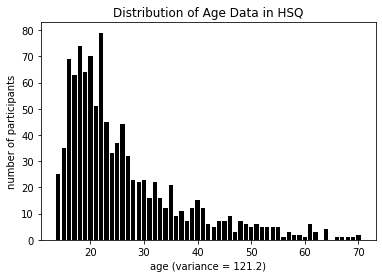

In [24]:
#checking the distribution of age and gender, we can see that the ages doesn't distribute evenly.
fig, ax = plt.subplots()
labels,counts = np.unique(df['age'], return_counts=True)
plt.bar(labels, counts, align='center',color='k')
plt.ylabel('number of participants')
plt.xlabel('age (variance = 121.2)')
plt.title("Distribution of Age Data in HSQ")
fig.savefig('age1.png')

In [25]:
df['age'].var()

121.23416247564641

In [26]:
df['age'].describe()

count    1051.000000
mean       26.267364
std        11.010639
min        14.000000
25%        18.000000
50%        22.000000
75%        30.000000
max        70.000000
Name: age, dtype: float64

In [27]:
##change age to 4 consistent age-groups, and four of them have relatively similar distribution.
#Because we only want to see whether older people have more tendency to use self-enhancing humour
df['age_range'] = pd.qcut(df['age'], q=4)

In [28]:
df['age_range'].value_counts()

(13.999, 18.0]    266
(18.0, 22.0]      264
(30.0, 70.0]      262
(22.0, 30.0]      259
Name: age_range, dtype: int64

In [29]:
# age_group 1 is from 14 - 18, representing teenagers before uni
# age_group 2 is from 18 - 22, uni students
# age_group 3 is form 22 - 30, representing young adults
# age_group 4 is form 30 - 70, representing mid-age adults
# we set the age-group from 0-3 so that the number can also represent which group is older.
age_label = [0, 1, 2, 3]
df['age_group'] = pd.qcut(df['age'], q=[0, .25, .5, .75, 1], labels=age_label)
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy,age_range,age_group
0,2.0,2.0,3.0,1.0,4.0,5.0,2.0,3.0,4.00000,3.0,...,2.0,3.000000,3.250,2.750,2.000,25.0,2.0,100.0,"(22.0, 30.0]",2
1,2.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,4.00000,3.0,...,1.0,3.000000,3.500,2.250,2.125,44.0,2.0,90.0,"(30.0, 70.0]",3
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.00000,4.0,...,2.0,2.875000,4.125,2.625,2.250,50.0,1.0,75.0,"(30.0, 70.0]",3
3,3.0,3.0,3.0,4.0,3.0,5.0,2.0,3.0,2.59542,4.0,...,3.0,3.199427,4.000,2.625,3.250,30.0,2.0,85.0,"(22.0, 30.0]",2
4,1.0,4.0,2.0,2.0,3.0,5.0,2.0,1.0,4.00000,4.0,...,2.0,2.875000,4.125,2.125,1.750,52.0,1.0,80.0,"(30.0, 70.0]",3


In [30]:
df['age_group'].value_counts()

0    266
1    264
3    262
2    259
Name: age_group, dtype: int64

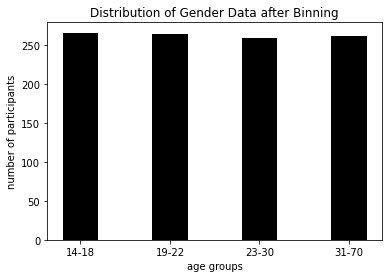

In [31]:
fig, ax = plt.subplots()
labels,counts = np.unique(df['age_group'], return_counts=True)
plt.bar(labels, counts, align='center',color='k',width=0.4)
plt.xticks([0,1, 2, 3], ['14-18', '19-22', '23-30','31-70'])
plt.ylabel('number of participants')
plt.xlabel('age groups')
plt.title("Distribution of Gender Data after Binning")
fig.savefig('age2.png')

In [32]:
#one hot encode gender so that when using regression, the machine won't consider that male is bigger than female in number 
df = pd.concat([df, pd.get_dummies(df['gender'], prefix="Gender")], axis=1)
df.drop(['gender'],axis = 1,inplace = True)
df.rename(columns={'Gender_1.0':'isMale','Gender_2.0':'isFemale'}, inplace=True)

In [33]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,affiliative,selfenhancing,aggressive,selfdefeating,age,accuracy,age_range,age_group,isMale,isFemale
0,2.0,2.0,3.0,1.0,4.0,5.0,2.0,3.0,4.00000,3.0,...,3.000000,3.250,2.750,2.000,25.0,100.0,"(22.0, 30.0]",2,0,1
1,2.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,4.00000,3.0,...,3.000000,3.500,2.250,2.125,44.0,90.0,"(30.0, 70.0]",3,0,1
2,3.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.00000,4.0,...,2.875000,4.125,2.625,2.250,50.0,75.0,"(30.0, 70.0]",3,1,0
3,3.0,3.0,3.0,4.0,3.0,5.0,2.0,3.0,2.59542,4.0,...,3.199427,4.000,2.625,3.250,30.0,85.0,"(22.0, 30.0]",2,0,1
4,1.0,4.0,2.0,2.0,3.0,5.0,2.0,1.0,4.00000,4.0,...,2.875000,4.125,2.125,1.750,52.0,80.0,"(30.0, 70.0]",3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,3.0,2.0,3.0,3.0,2.0,5.0,3.0,2.0,3.00000,4.0,...,3.250000,3.000,2.375,2.750,18.0,95.0,"(13.999, 18.0]",0,0,1
1047,1.0,4.0,5.0,2.0,4.0,4.0,5.0,2.0,2.00000,5.0,...,2.500000,3.875,4.500,2.625,31.0,95.0,"(30.0, 70.0]",3,1,0
1048,1.0,4.0,4.0,5.0,4.0,4.0,3.0,5.0,4.00000,3.0,...,2.875000,3.625,4.000,4.750,15.0,95.0,"(13.999, 18.0]",0,1,0
1049,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,4.00000,3.0,...,3.125000,3.625,3.125,2.500,21.0,87.0,"(18.0, 22.0]",1,0,1


In [34]:
df.drop(df.loc[:,"Q1":"Q32"], axis = 1, inplace = True)
df.drop(['age','accuracy','affiliative','age_range'],axis=1, inplace=True)
df

,selfenhancing,aggressive,selfdefeating,age_group,isMale,isFemale
0,3.250,2.750,2.000,2,0,1
1,3.500,2.250,2.125,3,0,1
2,4.125,2.625,2.250,3,1,0
3,4.000,2.625,3.250,2,0,1
4,4.125,2.125,1.750,3,1,0
...,...,...,...,...,...,...
1046,3.000,2.375,2.750,0,0,1
1047,3.875,4.500,2.625,3,1,0
1048,3.625,4.000,4.750,0,1,0
1049,3.625,3.125,2.500,1,0,1


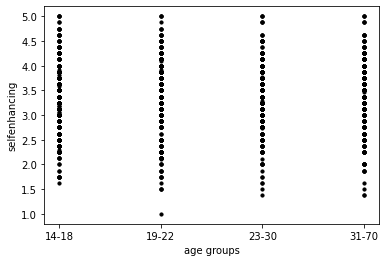

In [35]:
fig, ax = plt.subplots()
plt.scatter(df["age_group"],df["selfenhancing"],color='k', s= 10)
plt.xticks([0, 1, 2, 3], ['14-18', '19-22', '23-30','31-70'])
plt.ylabel('selfenhancing')
plt.xlabel('age groups')
# there isn't much differences between the mean of each age group so I comment it out
# a = df.loc[df['age_group'] == 0, 'selfenhancing'].values.mean()
# b = df.loc[df['age_group'] == 1, 'selfenhancing'].values.mean()
# c = df.loc[df['age_group'] == 2, 'selfenhancing'].values.mean()
# d = df.loc[df['age_group'] == 3, 'selfenhancing'].values.mean()
# plt.axhline(y=a,color="red",linestyle='-', label="14-18 mean" )
# plt.axhline(y=b,color="blue",linestyle='-', label="19-22 mean" )
# plt.axhline(y=c,color="green",linestyle='-', label="23-30 mean" )
# plt.axhline(y=d,color="orange",linestyle='-', label="31-70 mean" )
# plt.title("Correlation between age groups and self-enhancing")
# plt.legend()
fig.savefig('age&selfenhanicng.png')
plt.show()


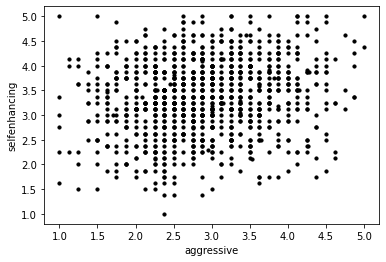

In [37]:
df.plot(x="aggressive",y="selfenhancing",kind="scatter", s = 10, color='black')
plt.savefig('agg_enhan.png')

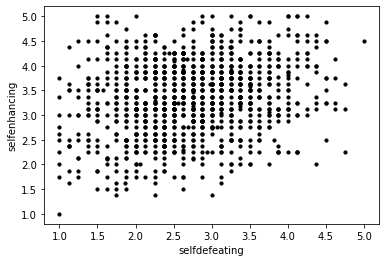

In [38]:
df.plot(x="selfdefeating",y="selfenhancing",kind="scatter", s = 10, color='black')
plt.savefig('defe_enhan.png')

In [39]:
#list all the type of gender
g = df.isMale.unique()
g

array([0, 1], dtype=uint8)

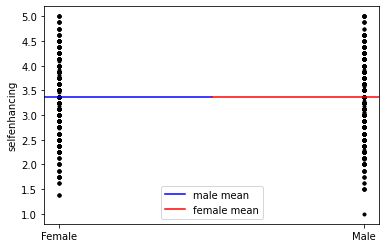

In [40]:
fig, ax = plt.subplots()
m = df.loc[df['isMale'] == 1, 'selfenhancing'].values.mean()
f = df.loc[df['isMale'] == 0, 'selfenhancing'].values.mean()

plt.xticks([0,1])
ax.set_xticklabels(['Female','Male'])
plt.ylabel('selfenhancing')
plt.plot(df['isMale'], df['selfenhancing'],'.k')
#drawing the mean score line for each group, we can see that the mean score of male and female is almost the same
plt.axhline(y=m,color="blue", linestyle='-', label="male mean", xmin=-1, xmax=0.5)
plt.axhline(y=f,color="red",linestyle='-', label="female mean", xmin=0.5, xmax=1.2 )
plt.legend()
fig.savefig('gender&selfenhanicng.png')


In [41]:
m

3.3617969440362034

In [42]:
f
#we can see that the mean value between male and female for self-enhancing is almost the same

3.358608189620485

In [43]:
#training data:
X = df.iloc[:,df.columns != "selfenhancing"]
#label data:
y = df.iloc[:,df.columns == "selfenhancing"]

In [44]:
#spliting the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3
                                                ,random_state = 20
                                               )

In [45]:
#create a pipeline to compare each model with different hyperparameter and find out the best combination for the model using GridSearchCV
#If there is convergence problem there will be warning from 'sklearn.exceptions.ConvergenceWarning', but there isn't any so it is the convergence of the optimization
#might take a while, can have some bubble tea in the mean time while you are waiting ;D

reg_pipe = Pipeline([('ss', StandardScaler()), #rescaling the features, centralizes data with unit variance
                     ('pf', PolynomialFeatures()), #checking whether polynomial function better suits the model
                       ('reg', Lasso())
                      ])

params = [{'reg__alpha': [0.1,1,10,50,70,100] #hyperparameter for regularized regressions Lasso and Ridge
           ,'reg': [Lasso(), Ridge()]
           ,'pf__degree': [1,2,3,4,5]#up to 5 degree because there are five features in the dataset
         }, {
    'reg': [LinearRegression()]#LinearRegression doesn't have alpha
    ,'pf__degree': [1,2,3,4,5]
}]

#using repeated k fold to improve the estimated performance the model, it'll tackle data over-fitting
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=20)

gs_reg = GridSearchCV(reg_pipe,
                      param_grid=params,
                      scoring = ["neg_mean_squared_error",'r2'],
                      refit = "neg_mean_squared_error",
                      cv=cv)
gs_reg.fit(X_train, y_train)
gs_reg.best_params_


{'pf__degree': 1, 'reg': Ridge(alpha=70), 'reg__alpha': 70}

In [46]:
df3 = pd.DataFrame(gs_reg.cv_results_)
df3['param_reg'] = df3['param_reg'].astype(str)
model_compare = df3.sort_values('rank_test_neg_mean_squared_error')[[
    'param_pf__degree',
    'param_reg',
    'param_reg__alpha',
    'mean_test_neg_mean_squared_error',
    'mean_test_r2',
    'rank_test_neg_mean_squared_error'
]]
model_compare

,param_pf__degree,param_reg,param_reg__alpha,mean_test_neg_mean_squared_error,mean_test_r2,rank_test_neg_mean_squared_error
10,1,Ridge(alpha=70),70,-0.546675,0.038751,1
9,1,Ridge(alpha=70),50,-0.546708,0.038640,2
11,1,Ridge(alpha=70),100,-0.546711,0.038763,3
8,1,Ridge(alpha=70),10,-0.546952,0.038092,4
7,1,Ridge(alpha=70),1,-0.547046,0.037895,5
...,...,...,...,...,...,...
57,5,Ridge(alpha=70),50,-0.680276,-0.195423,61
56,5,Ridge(alpha=70),10,-0.725919,-0.275770,62
55,5,Ridge(alpha=70),1,-0.747297,-0.313572,63
54,5,Ridge(alpha=70),0.1,-0.750021,-0.318397,64


In [47]:
model_display = model_compare = df3.sort_values('param_reg__alpha')[[
    'mean_test_neg_mean_squared_error',
    'mean_test_r2',
    'param_reg__alpha',
    'param_pf__degree',
    'param_reg'
]]
model_display['param_reg'] = model_display['param_reg'].astype(str)

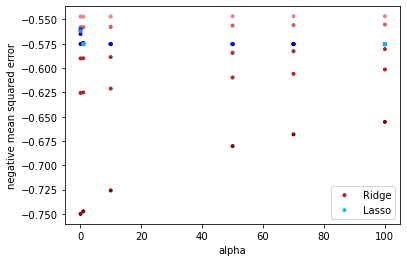

In [48]:
fig, ax = plt.subplots()
ridge_mse = model_display.loc[model_display['param_reg'] == 'Ridge(alpha=70)', 'mean_test_neg_mean_squared_error']
lasso_mse = model_display.loc[model_display['param_reg'] == 'Lasso()', 'mean_test_neg_mean_squared_error']

ridge_alpha = model_display.loc[model_display['param_reg'] == 'Ridge(alpha=70)', 'param_reg__alpha']
lasso_alpha = model_display.loc[model_display['param_reg'] == 'Lasso()', 'param_reg__alpha']

ridge_degree = model_display.loc[model_display['param_reg'] == 'Ridge(alpha=70)', 'param_pf__degree']
lasso_degree = model_display.loc[model_display['param_reg'] == 'Lasso()', 'param_pf__degree']

ridge_colours = []
for i in ridge_degree:
    if i == 1:
        ridge_colours.append(mcolors.to_rgb('lightcoral'))
    elif i == 2:
        ridge_colours.append(mcolors.to_rgb('indianred'))
    elif i == 3:
        ridge_colours.append(mcolors.to_rgb('brown'))
    elif i == 4:
        ridge_colours.append(mcolors.to_rgb('firebrick'))
    elif i == 5:
        ridge_colours.append(mcolors.to_rgb('maroon'))


plt.scatter(ridge_alpha,ridge_mse,  label="Ridge", marker = '.', c= ridge_colours)

lasso_colours = []
for i in lasso_degree:
    if i == 1:
        lasso_colours.append(mcolors.to_rgb('deepskyblue'))
    elif i == 2:
        lasso_colours.append(mcolors.to_rgb('dodgerblue'))
    elif i == 3:
        lasso_colours.append(mcolors.to_rgb('blue'))
    elif i == 4:
        lasso_colours.append(mcolors.to_rgb('mediumblue'))
    elif i == 5:
        lasso_colours.append(mcolors.to_rgb('navy'))
plt.scatter(lasso_alpha, lasso_mse,label="Lasso", marker = '.', c = lasso_colours)
plt.xlabel('alpha')
plt.ylabel('negative mean squared error')
plt.legend()
# plt.show
fig.savefig('hyperparameter', bbox_inches='tight')

In [49]:
#we can see whether the model correctly represents enough of the data variance
r2 = gs_reg.best_estimator_.score(X_test, y_test)

r2

0.0793124679554823

In [50]:
gs_reg.best_estimator_

Pipeline(steps=[('ss', StandardScaler()), ('pf', PolynomialFeatures(degree=1)),
                ('reg', Ridge(alpha=70))])

In [51]:
#prediced values base on the regression model by X_test
predict = gs_reg.best_estimator_.predict(X_test) 
predict

array([[3.17098844],
       [3.44980949],
       [3.60655296],
       [3.44076088],
       [3.7603131 ],
       [3.47299516],
       [3.40960029],
       [3.15820751],
       [3.55400077],
       [3.52045319],
       [3.32422519],
       [3.16603173],
       [3.20162587],
       [3.49998554],
       [3.21137917],
       [3.3289043 ],
       [3.30381097],
       [3.41256388],
       [3.32217863],
       [3.32707129],
       [3.56387155],
       [3.25176989],
       [3.2970853 ],
       [3.35761265],
       [3.5435534 ],
       [3.32926735],
       [3.0824362 ],
       [3.27679918],
       [3.20841558],
       [2.88451407],
       [3.57869903],
       [3.50331217],
       [3.33394646],
       [3.29207516],
       [3.41775554],
       [3.399847  ],
       [3.31236129],
       [3.47019169],
       [3.63433372],
       [3.21816888],
       [3.19106102],
       [3.41594826],
       [3.31410884],
       [3.28180931],
       [3.4029921 ],
       [3.22351004],
       [3.46022484],
       [3.498

In [52]:
# checking the differences between the actual data and the predicted data.
print(mean_squared_error(y_test,predict))
print(mean_absolute_error(y_test,predict))

0.4996743516575564
0.5739342032859666


In [53]:
y_test.values

array([[3.75      ],
       [4.25      ],
       [4.5       ],
       [2.49629895],
       [3.625     ],
       [3.375     ],
       [3.5       ],
       [1.75      ],
       [4.5       ],
       [3.375     ],
       [2.875     ],
       [3.        ],
       [2.75      ],
       [4.5       ],
       [2.875     ],
       [2.25      ],
       [4.5       ],
       [4.25      ],
       [3.25      ],
       [2.5       ],
       [4.        ],
       [3.125     ],
       [4.        ],
       [4.25      ],
       [3.        ],
       [2.        ],
       [3.        ],
       [4.625     ],
       [2.125     ],
       [2.625     ],
       [3.625     ],
       [3.25      ],
       [2.25      ],
       [3.5       ],
       [3.5       ],
       [3.375     ],
       [4.375     ],
       [3.        ],
       [4.125     ],
       [3.75      ],
       [2.375     ],
       [2.75      ],
       [4.75      ],
       [2.        ],
       [2.75      ],
       [2.5       ],
       [3.75      ],
       [3.875

In [54]:
result = pd.DataFrame(np.c_[y_test.values,predict],columns = ["actual","predict"])
result

,actual,predict
0,3.750000,3.170988
1,4.250000,3.449809
2,4.500000,3.606553
3,2.496299,3.440761
4,3.625000,3.760313
...,...,...
311,3.375000,3.216656
312,3.125000,3.905799
313,3.375000,3.399516
314,3.125000,3.558584


In [55]:
# reindex according to the column of actual data.
result = result.sort_values('actual')
result

,actual,predict
285,1.000,2.995068
161,1.500,3.151087
256,1.500,3.080657
134,1.625,3.276145
172,1.750,3.429972
...,...,...
300,4.875,3.246429
207,5.000,3.747084
307,5.000,3.448211
219,5.000,3.619090


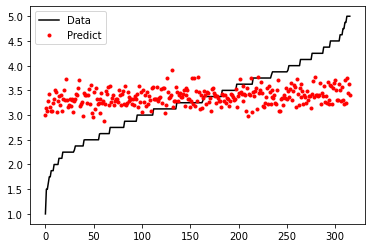

In [56]:
#as you can see, the data set is so bad that we can't predict anything :/, sad
fig, ax = plt.subplots()
plt.plot(range(len(predict)), result['actual'], c='black', label="Data")
plt.plot(range(len(predict)), result['predict'], '.r', label="Predict")
plt.legend()
plt.show
fig.savefig('predict.png')